## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Camera Calibration 

In [96]:
#Adding required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2
import glob # To read all images inside a folder
import yaml

# Flag for debugging the output
DEFINE_DEBUG = 1    
CALIBRATE = 1 
# Write real world co-ordinates of the corners of the chess board.    
objp = np.zeros(((9*6),3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
     
# Lists for holding objects points and their image coordinates
imgpoints = []
objpoints = []

# This function return Grayscale image
def grayscale(img):    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# This function draws corners of the chess board on the color input image
def draw_chess_board_corners(ret, corners, img, objpoints, imgpoints):
    if (ret == True):
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners)
        if(0):
            plt.imshow(img, cmap ='gray')
            plt.title("ChessBoard Corner Image")
            plt.show()
        return objpoints, imgpoints

# This function calculates Camera matrix and Distortion coeffients 
def calibrate_camera(images):
    for image in images:
        img = plt_img.imread(image)
        gray = grayscale(img)
        if(0):
            plt.imshow(gray, cmap ='gray')
            plt.title("Grayscale image")
            plt.show()
    
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)    
        draw_chess_board_corners(ret, corners, img, objpoints, imgpoints)            
    #Calibrate camera     
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    # Returns Camera matrix (mtx) and Distortion coeffients (dist)
    return mtx, dist

def undistort_chessboard_images(images, mtx, dist):
    for image in images:
        img = plt_img.imread(image)
        # Un-distort images
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        if(0):
            plt.imshow(dst)
            plt.title("ChessBoard Corner Image")
            plt.show()

def undistort_images(image, mtx, dist):
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    if(1):
        plt.imshow(dst)
        plt.title("ChessBoard Corner Image")
        plt.show()
    return dst

## Binary image creation
Use color transforms, gradients, etc., to create a thresholded binary image.

In [97]:
# Edit this function to create your own pipeline.
def binary_image_creation(img, sx_thresh=(20, 100), s_thresh=(170, 255)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)    
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary

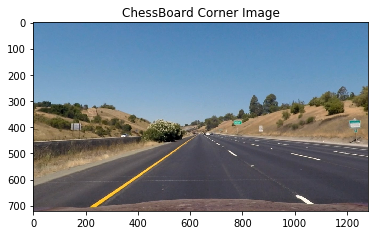

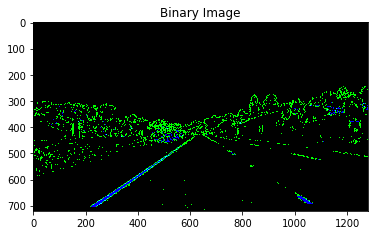

In [98]:
        
if (__name__== '__main__' ):
    # Read all images from a folder
    images = glob.glob("camera_cal/*.jpg")
    
    if (CALIBRATE):
        # Calibrate Camera
        mtx, dist = calibrate_camera(images)   
        
    # Undistort Chess Images
    if(0):
        undistort_chessboard_images(image, mtx, dist)
    
    # Undistort Test Images
    image = plt_img.imread("test_images/straight_lines1.jpg")
    undistorted_image = undistort_images(image, mtx, dist)
    
    # Binary image creation
    binay_image = binary_image_creation(undistorted_image, sx_thresh=(20, 100), s_thresh=(170, 255))
    if(1):
        plt.imshow(binay_image)
        plt.title("Binary Image")
        plt.show()